# ML-7. Оптимизация гиперпараметров модели. Практика.

Александр Журавлев DST-120

***

Наша практика будет основана на соревновании [Kaggle: Predicting a Biological Response](https://www.kaggle.com/c/bioresponse) (Прогнозирование биологического ответа).


Необходимо предсказать биологический ответ молекул (столбец 'Activity') по их химическому составу (столбцы D1-D1776).

[скачать данные](https://lms.skillfactory.ru/assets/courseware/v1/9f2add5bca59f8c4df927432d605fff3/asset-v1:SkillFactory+DST-3.0+28FEB2021+type@asset+block/_train_sem09__1_.zip)

Данные представлены в формате CSV.  Каждая строка представляет молекулу. 

Первый столбец Activity содержит экспериментальные данные, описывающие фактический биологический ответ [0, 1];  
Остальные столбцы D1-D1776 представляют собой молекулярные дескрипторы — это вычисляемые свойства, которые могут фиксировать некоторые характеристики молекулы, например размер, форму или состав элементов.

Предварительная обработка не требуется, данные уже закодированы и нормализованы.

В качестве метрики будем использовать F1-score.

Необходимо обучить две модели: логистическую регрессию и случайный лес. Далее нужно сделать подбор гиперпараметров с помощью базовых и продвинутых методов оптимизации. Важно использовать все четыре метода (GridSeachCV, RandomizedSearchCV, Hyperopt, Optuna) хотя бы по разу, максимальное количество итераций не должно превышать 50.

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-egvr{background-color:#EB6B56;color:#333;text-align:center;vertical-align:middle}
.tg .tg-apyk{background-color:#FFF;color:#333;font-weight:bold;text-align:center;vertical-align:top}
.tg .tg-oh3p{background-color:#F7DA64;color:#333;text-align:center;vertical-align:middle}
.tg .tg-ukt2{background-color:#61BD6D;color:#333;text-align:center;vertical-align:middle}
.tg .tg-citn{background-color:#FFF;color:#333;text-align:left;vertical-align:top}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-apyk"><span style="font-weight:600;font-style:inherit">Балл</span></th>
    <th class="tg-apyk"><span style="font-weight:600;font-style:inherit">Критерий</span></th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-egvr"><span style="font-weight:inherit;font-style:inherit;background-color:#EB6B56">0</span></td>
    <td class="tg-citn"><span style="font-weight:inherit;font-style:inherit">Задание не выполнено</span></td>
  </tr>
  <tr>
    <td class="tg-oh3p"><span style="font-weight:inherit;font-style:inherit;background-color:#F7DA64">1</span></td>
    <td class="tg-citn"><span style="font-weight:inherit;font-style:inherit">Обучено две модели; гипепараметры подобраны при помощи одного метода</span></td>
  </tr>
  <tr>
    <td class="tg-oh3p"><span style="font-weight:inherit;font-style:inherit;background-color:#F7DA64">2</span></td>
    <td class="tg-citn"><span style="font-weight:inherit;font-style:inherit">Обучено две модели; гипепараметры подобраны при помощи двух методов</span></td>
  </tr>
  <tr>
    <td class="tg-ukt2"><span style="font-weight:inherit;font-style:inherit;background-color:#61BD6D">3</span></td>
    <td class="tg-citn"><span style="font-weight:inherit;font-style:inherit">Обучено две модели; гипепараметры подобраны при помощи трёх методов</span></td>
  </tr>
  <tr>
    <td class="tg-ukt2"><span style="font-weight:inherit;font-style:inherit;background-color:#61BD6D">4</span></td>
    <td class="tg-citn"><span style="font-weight:inherit;font-style:inherit">Обучено две модели; гипепараметры подобраны при помощи четырёх методов</span></td>
  </tr>
  <tr>
    <td class="tg-ukt2"><span style="font-weight:inherit;font-style:inherit;background-color:#61BD6D">5</span></td>
    <td class="tg-citn"><span style="font-weight:inherit;font-style:inherit">Обучено две модели; гипепараметры подобраны при помощи четырёх методов; использована кросс-валидация</span></td>
  </tr>
</tbody>
</table>

***

## 1. Загружаем библиотеки, загружаем и знакомимся с данными

In [1]:
# импорт библиотек
import numpy as np # для матричных вычислений
import pandas as pd # для анализа и предобработки данных
import matplotlib.pyplot as plt # для визуализации
import seaborn as sns # для визуализации

from sklearn import linear_model # линейные моделиё
from sklearn import tree # деревья решений
from sklearn import ensemble # ансамбли
from sklearn import metrics # метрики
from sklearn import preprocessing # предобработка
from sklearn import model_selection
from sklearn.model_selection import train_test_split # сплитование выборки

# для оптимизации модели
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import hyperopt
from hyperopt import hp, fmin, tpe, Trials
import optuna

# настройка визуализации
%matplotlib inline
plt.style.use('seaborn')
%config InlineBackend.figure_format = 'svg'

# не отображаем предупреждения
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')


In [2]:
# загружаем данные и знакомиммся с ними
data = pd.read_csv('data/train_sem09.csv')
data.head()

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,...,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,...,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,...,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,...,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# пропусков быть не должно, но проверим на всякий случай
data[data.isnull().any(axis=1)]

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776


1    0.542255
0    0.457745
Name: Activity, dtype: float64

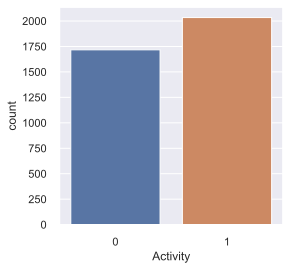

In [4]:
# оценим сбалансированность классов

display(data.Activity.value_counts(normalize=True))

sns.set(rc={'figure.figsize':(4,4)})
sns.countplot(data=data, x='Activity');

***

## 2. Алгоритм решения задачи

- Мы имеем дело с несбалансированным набором данных. Разделим данные в соотношении 80/20 на тренировочную и тестовую выборки соответственно, используя стратификацию.
- Тестовую выборку мы будем использовать для оценки качества обученной модели. При настройке гиперпараметров модель видеть тестовые данные не будет.
- Будем использовать кросс-валидацию, соответственно выделять из обучающего набора данных валидационную выборку не нужно - алгоритм это сделает самостоятельно.
- Будем использовать кросс-валидатор StratifiedKFold()

***

## 3. Разделим выборку и определим константы

In [5]:
# фиксируем random_state
random_state = 42

In [6]:
# фиксируем max_iter, согласно условиям задания - не более 50
max_iter = 50

In [7]:
# создаём и фиксируем объект кросс-валидатора KFold
kf = model_selection.StratifiedKFold(n_splits=10, shuffle=True, random_state=random_state)

**Примечание:** Конечно, *GridSearchCV* и *RandomizedSearchCV* при использовании классификатора с кросс-валидацией автоматически используют StratifiedKFold, но здесь мы можем поиграться, например, со значением shuffle

Создаем матрицу наблюдений $X$ и вектор ответов $y$

In [8]:
X = data.drop(['Activity'], axis=1)
y = data['Activity']

Разделяем выборку на тренировочную и тестовую в соотношении 80/20. Для сохранения соотношений целевого признака используем параметр stratify (стратифицированное разбиение). 

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state = random_state, test_size = 0.2)

***

## 4. Логистическая регрессия

### 4.1. Логистическая регрессия с кросс-валидацией

In [10]:
# Создаём модель
model_lr = linear_model.LogisticRegression(
    max_iter = max_iter, 
    random_state = random_state
    )
 
# Считаем метрики на кросс-валидации k-fold
cv_metrics = model_selection.cross_validate(
    estimator=model_lr, # модель
    X=X_train, # матрица наблюдений X
    y=y_train, # вектор ответов y
    cv=kf, # кросс-валидатор
    scoring='f1', # метрика
    return_train_score=True # подсчёт метрики на тренировочных фолдах
)

# выводим метрики
print('Train k-fold mean f1_score: {:.2f}'.format(np.mean(cv_metrics['train_score'])))
print('Valid k-fold mean f1_score: {:.2f}'.format(np.mean(cv_metrics['test_score'])))

Train k-fold mean f1_score: 0.89
Valid k-fold mean f1_score: 0.78


In [11]:
# обучаем модель
model_lr.fit(X_train, y_train)

# делаем предсказание на тестовой выборке
y_test_pred = model_lr.predict(X_test)

# расчитываем и выводим метрику на тестовой выборке
print('Test f1_score: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

Test f1_score: 0.78


## 5. Оптимизация гиперпараметров

### 5.1. GridSearchCV

In [12]:
# убираем назойливые предупреждения из выводных ячеек
if not sys.warnoptions:
    warnings.simplefilter("ignore")
    os.environ["PYTHONWARNINGS"] = "ignore" # Also affect subprocesses

In [13]:
# создаем сетку параметров
param_grid = [
            {'penalty': ['l2', 'none'] , # тип регуляризации
            'solver': ['lbfgs', 'sag', 'newton-cg', 'newton-cholesky'], # алгоритм оптимизации
            'C': [0.01, 0.1, 0.3, 0.5, 0.7, 0.9, 1]}, # уровень силы регурялизации
              
            {'penalty': ['l1', 'l2'] ,
            'solver': ['liblinear'],
            'C': [0.01, 0.1, 0.3, 0.5, 0.7, 0.9, 1]},
              
            {'penalty': ['l1', 'l2', 'elasticnet', 'none'] ,
            'solver': ['saga'],
            'C': [0.01, 0.1, 0.3, 0.5, 0.7, 0.9, 1]}
]

# создаем объект GridSearchCV
model_lr_gscv = GridSearchCV(
    estimator=linear_model.LogisticRegression(
        random_state=random_state, 
        max_iter=max_iter 
        ), 
    param_grid=param_grid, 
    cv=kf, 
    n_jobs = -1,
    scoring='f1'
) 

# проводим обучение 
%time model_lr_gscv.fit(X_train, y_train) 


CPU times: user 3.2 s, sys: 581 ms, total: 3.78 s
Wall time: 3min 57s


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=LogisticRegression(max_iter=50, random_state=42),
             n_jobs=-1,
             param_grid=[{'C': [0.01, 0.1, 0.3, 0.5, 0.7, 0.9, 1],
                          'penalty': ['l2', 'none'],
                          'solver': ['lbfgs', 'sag', 'newton-cg',
                                     'newton-cholesky']},
                         {'C': [0.01, 0.1, 0.3, 0.5, 0.7, 0.9, 1],
                          'penalty': ['l1', 'l2'], 'solver': ['liblinear']},
                         {'C': [0.01, 0.1, 0.3, 0.5, 0.7, 0.9, 1],
                          'penalty': ['l1', 'l2', 'elasticnet', 'none'],
                          'solver': ['saga']}],
             scoring='f1')

In [14]:
print("Наилучшая модель:\n{}".format(model_lr_gscv.best_estimator_))
print("Наилучшее значение f1_score при кросс-валидаци: {:.2f}".format(model_lr_gscv.best_score_))

Наилучшая модель:
LogisticRegression(C=0.1, max_iter=50, random_state=42, solver='saga')
Наилучшее значение f1_score при кросс-валидаци: 0.79


In [15]:
# Создаём модель с подобранными гиперпараметрами
model_lr_gscv = linear_model.LogisticRegression(
    max_iter = max_iter, 
    random_state = random_state,
    
    C=0.1,
    penalty='l1',
    solver='saga'
    )

# Считаем метрики на кросс-валидации k-fold
cv_metrics = model_selection.cross_validate(
    estimator=model_lr_gscv, # модель
    X=X_train, # матрица наблюдений X
    y=y_train, # вектор ответов y
    cv=kf, # кросс-валидатор
    scoring='f1', # метрика
    return_train_score=True # подсчёт метрики на тренировочных фолдах
)
# выводим метрики
print('Train k-fold mean f1_score: {:.2f}'.format(np.mean(cv_metrics['train_score'])))
print('Valid k-fold mean f1_score: {:.2f}'.format(np.mean(cv_metrics['test_score'])))


Train k-fold mean f1_score: 0.80
Valid k-fold mean f1_score: 0.78


In [16]:
# обучаем модель
model_lr_gscv.fit(X_train, y_train)

# делаем предсказание на тестовой выборке
y_test_pred = model_lr_gscv.predict(X_test)

# расчитываем и выводим метрику на тестовой выборке
print('Test f1_score: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

Test f1_score: 0.77


### 5.2. RandomizedSearchCV

In [17]:
# создаем сетку параметров
param_distributions = [
              {'penalty': ['l2', 'none'] , # тип регуляризации
              'solver': ['lbfgs', 'sag', 'newton-cg', 'newton-cholesky'], # алгоритм оптимизации
               'C': list(np.linspace(0.01, 1, 10, dtype=float))}, # уровень силы регурялизации
              
              {'penalty': ['l1', 'l2'] ,
              'solver': ['liblinear'],
               'C': list(np.linspace(0.01, 1, 10, dtype=float))},
              
              {'penalty': ['l1', 'l2', 'elasticnet', 'none'] ,
              'solver': ['saga'],
               'C': list(np.linspace(0.01, 1, 10, dtype=float))}
]

# создаем объект RandomizedSearchCV
model_lr_rscv = RandomizedSearchCV(
    estimator=linear_model.LogisticRegression(
        random_state=random_state, 
        max_iter=max_iter
        ), 
    param_distributions=param_distributions, 
    cv=kf, 
    n_iter = 10, 
    n_jobs = -1,
    scoring='f1'
)  
%time model_lr_rscv.fit(X_train, y_train) 

CPU times: user 1.83 s, sys: 314 ms, total: 2.14 s
Wall time: 32 s


RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
                   estimator=LogisticRegression(max_iter=50, random_state=42),
                   n_jobs=-1,
                   param_distributions=[{'C': [0.01, 0.12, 0.23, 0.34, 0.45,
                                               0.56, 0.67, 0.78, 0.89, 1.0],
                                         'penalty': ['l2', 'none'],
                                         'solver': ['lbfgs', 'sag', 'newton-cg',
                                                    'newton-cholesky']},
                                        {'C': [0.01, 0.12, 0.23, 0.34, 0.45,
                                               0.56, 0.67, 0.78, 0.89, 1.0],
                                         'penalty': ['l1', 'l2'],
                                         'solver': ['liblinear']},
                                        {'C': [0.01, 0.12, 0.23, 0.34, 0.45,
                                               0.56, 0.67, 0.78, 0.89, 1.0],
                                         'penalty': ['l1', 'l2', 'elasticnet',
                                                     'none'],
                                         'solver': ['saga']}],
                   scoring='f1')

In [18]:
print("Наилучшая модель:\n{}".format(model_lr_rscv.best_estimator_))
print("Наилучшее значение f1_score при кросс-валидаци: {:.2f}".format(model_lr_rscv.best_score_))

Наилучшая модель:
LogisticRegression(C=0.12, max_iter=50, random_state=42, solver='saga')
Наилучшее значение f1_score при кросс-валидаци: 0.79


In [19]:
# Создаём модель с подобранными гиперпараметрами
model_lr_rscv = linear_model.LogisticRegression(
    max_iter = max_iter, 
    random_state = random_state,
    
    C=0.01,
    penalty='l2',
    solver='newton-cg'
    )
# Считаем метрики на кросс-валидации k-fold
cv_metrics = model_selection.cross_validate(
    estimator=model_lr_rscv, # модель
    X=X_train, # матрица наблюдений X
    y=y_train, # вектор ответов y
    cv=kf, # кросс-валидатор
    scoring='f1', # метрика
    return_train_score=True # подсчёт метрики на тренировочных фолдах
)
# выводим метрики
print('Train k-fold mean f1_score: {:.2f}'.format(np.mean(cv_metrics['train_score'])))
print('Valid k-fold mean f1_score: {:.2f}'.format(np.mean(cv_metrics['test_score'])))


Train k-fold mean f1_score: 0.82
Valid k-fold mean f1_score: 0.79


In [20]:
# обучаем модель
model_lr_rscv.fit(X_train, y_train)

# делаем предсказание на тестовой выборке
y_test_pred = model_lr_rscv.predict(X_test)

# расчитываем и выводим метрику на тестовой выборке
print('Test f1_score: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

Test f1_score: 0.78


### 5.3. Hyperopt

In [21]:
# зададим пространство поиска гиперпараметров
space={'penalty': hp.choice('penalty',['l2', 'none']) , # тип регуляризации
       'solver': hp.choice('solver', ['lbfgs', 'sag', 'newton-cg']), # алгоритм оптимизации
       'C': hp.uniform('C', low=0.01, high=10) # уровень силы регурялизации
} 

In [22]:
def hyperopt_rf(params, cv=5, X=X_train, y=y_train, random_state=random_state):
    # функция получает комбинацию гиперпараметров в "params"
    params = {'penalty': params['penalty'], 
              'solver': params['solver'], 
              'C': float(params['C'])
              }
  
    # используем эту комбинацию для построения модели
    model = linear_model.LogisticRegression(**params, 
                                            random_state=random_state,
                                            max_iter=max_iter
                                            )

    # обучаем модель
    model.fit(X, y)
    
    # метрика без кросс-валидации
    #score = metrics.f1_score(y, model.predict(X))
    
    # метрика с кросс-валидацией
    score = cross_val_score(model, X, y, cv=kf, scoring="f1", n_jobs=-1).mean()

    # метрику необходимо минимизировать, поэтому ставим знак минус
    return -score

In [23]:
%%time 
# начинаем подбор гиперпараметров

trials = Trials() # используется для логирования результатов

best=fmin(hyperopt_rf, # наша функция 
          space=space, # пространство гиперпараметров
          algo=tpe.suggest, # алгоритм оптимизации, установлен по умолчанию, задавать необязательно
          max_evals=20, # максимальное количество итераций
          trials=trials, # логирование результатов
          #rstate=np.random.RandomState(random_state)# фиксируем для повторяемости результата - старая версия
          rstate=np.random.default_rng(random_state) # фиксируем для повторяемости результата
         )

100%|██████████| 20/20 [03:35<00:00, 10.76s/trial, best loss: -0.785457407377707] 
CPU times: user 11min 13s, sys: 15.9 s, total: 11min 29s
Wall time: 3min 35s


In [24]:
print("Наилучшие значения гиперпараметров {}".format(best))

Наилучшие значения гиперпараметров {'C': 0.42219097013541806, 'penalty': 0, 'solver': 0}


In [25]:
# создадим модель с подобранными гиперпараметрами
model_lr_hyperopt = linear_model.LogisticRegression( 
        random_state=random_state,
        max_iter=max_iter, 
        
        penalty='l2',
        solver='lbfgs',
        C=best['C']
)

# Считаем метрики на кросс-валидации k-fold
cv_metrics = model_selection.cross_validate(
    estimator=model_lr_hyperopt, # модель
    X=X_train, # матрица наблюдений X
    y=y_train, # вектор ответов y
    cv=kf, # кросс-валидатор
    scoring='f1', # метрика
    return_train_score=True # подсчёт метрики на тренировочных фолдах
)
# выводим метрики
print('Train k-fold mean f1_score: {:.2f}'.format(np.mean(cv_metrics['train_score'])))
print('Valid k-fold mean f1_score: {:.2f}'.format(np.mean(cv_metrics['test_score'])))

Train k-fold mean f1_score: 0.88
Valid k-fold mean f1_score: 0.79


In [26]:
# обучаем модель
model_lr_hyperopt.fit(X_train, y_train)

# считаем и выводим метрику на тестовой выборке
y_test_pred = model_lr_hyperopt.predict(X_test)
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

f1_score на тестовом наборе: 0.78


### 5.4. Optuna

In [27]:
def optuna_rf(trial):
    # задаем пространства поиска гиперпараметров
    penalty = trial.suggest_categorical('penalty', ['l2', 'none'])
    solver = trial.suggest_categorical('solver', ['lbfgs', 'sag', 'newton-cg'])
    C = trial.suggest_float('C', low=0.01, high=10, step=0.01)

    # создаем модель
    model = linear_model.LogisticRegression( 
          random_state=random_state,
          max_iter=max_iter,
        
          penalty=penalty,
          solver=solver,
          C=C
    )
    
    # обучаем модель
    model.fit(X_train, y_train)
    
    # метрика без кросс-валидации
    #score = metrics.f1_score(y_train, model.predict(X_train))

    # метрика с кросс-валидацией
    score = cross_val_score(model, X_train, y_train, cv=kf, scoring="f1", n_jobs=-1).mean()

    return score

In [28]:
%%time
# cоздаем объект исследования
# можем напрямую указать, что нам необходимо максимизировать метрику direction="maximize"
study = optuna.create_study(study_name="LogisticRegression", direction="maximize")
# ищем лучшую комбинацию гиперпараметров n_trials раз
study.optimize(optuna_rf, n_trials=20)

[I 2023-01-29 20:15:58,622] A new study created in memory with name: LogisticRegression
[I 2023-01-29 20:16:39,733] Trial 0 finished with value: 0.7093777733935697 and parameters: {'penalty': 'none', 'solver': 'newton-cg', 'C': 4.6899999999999995}. Best is trial 0 with value: 0.7093777733935697.
[I 2023-01-29 20:16:49,476] Trial 1 finished with value: 0.7681199954015365 and parameters: {'penalty': 'l2', 'solver': 'newton-cg', 'C': 5.0}. Best is trial 1 with value: 0.7681199954015365.
[I 2023-01-29 20:17:28,419] Trial 2 finished with value: 0.7093777733935697 and parameters: {'penalty': 'none', 'solver': 'newton-cg', 'C': 7.04}. Best is trial 1 with value: 0.7681199954015365.
[I 2023-01-29 20:17:30,899] Trial 3 finished with value: 0.7780433546300226 and parameters: {'penalty': 'none', 'solver': 'sag', 'C': 5.9399999999999995}. Best is trial 3 with value: 0.7780433546300226.
[I 2023-01-29 20:17:33,371] Trial 4 finished with value: 0.7780433546300226 and parameters: {'penalty': 'none', '

CPU times: user 6min 7s, sys: 7.36 s, total: 6min 14s
Wall time: 2min 10s


In [29]:
# выводим результаты на обучающей выборке
print("Наилучшие значения гиперпараметров {}".format(study.best_params))
print("f1_score на обучающем наборе: {:.2f}".format(study.best_value))

Наилучшие значения гиперпараметров {'penalty': 'l2', 'solver': 'sag', 'C': 0.31}
f1_score на обучающем наборе: 0.79


In [30]:
# создаем модель с подобранными гиперпараметрами
model_lr_optuna = linear_model.LogisticRegression( 
        **study.best_params,                                
        random_state=random_state,
        max_iter=max_iter
)
# Считаем метрики на кросс-валидации k-fold
cv_metrics = model_selection.cross_validate(
    estimator=model_lr_optuna, # модель
    X=X_train, # матрица наблюдений X
    y=y_train, # вектор ответов y
    cv=kf, # кросс-валидатор
    scoring='f1', # метрика
    return_train_score=True # подсчёт метрики на тренировочных фолдах
)
# выводим метрики
print('Train k-fold mean f1_score: {:.2f}'.format(np.mean(cv_metrics['train_score'])))
print('Valid k-fold mean f1_score: {:.2f}'.format(np.mean(cv_metrics['test_score'])))


Train k-fold mean f1_score: 0.87
Valid k-fold mean f1_score: 0.79


In [31]:
# обучаем модель
model_lr_optuna.fit(X_train, y_train)

# расчитываем и выводим метрику на тестовом наборе
y_test_pred = model_lr_optuna.predict(X_test)
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

f1_score на тестовом наборе: 0.78


***

## 6. Случайный лес 

### 6.1. Случайный лес с кросс-валидацией

In [32]:
#Создаем объект класса случайный лес
model_rf = ensemble.RandomForestClassifier(
    random_state=random_state
)

# Считаем метрики на кросс-валидации k-fold
cv_metrics = model_selection.cross_validate(
    estimator=model_rf, # модель
    X=X_train, # матрица наблюдений X
    y=y_train, # вектор ответов y
    cv=kf, # кросс-валидатор
    scoring='f1', # метрика
    return_train_score=True # подсчёт метрики на тренировочных фолдах
)

# выводим метрики
print('Train k-fold mean f1_score: {:.2f}'.format(np.mean(cv_metrics['train_score'])))
print('Valid k-fold mean f1_score: {:.2f}'.format(np.mean(cv_metrics['test_score'])))

Train k-fold mean f1_score: 1.00
Valid k-fold mean f1_score: 0.82


In [33]:
#Обучаем модель
model_rf.fit(X_train, y_train)

# делаем предсказание на тестовой выборке
y_test_pred = model_rf.predict(X_test)

# расчитываем и выводим метрику на тестовой выборке
print('Test f1_score: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

Test f1_score: 0.80


## 7. Оптимизация гиперпараметров

### 7.1. GridSearchCV

In [34]:
# создаем сетку параметров
param_grid = {'n_estimators': list(range(80, 200, 10)),
              'min_samples_leaf': [2],
              'max_depth': list(np.linspace(20, 40, 10, dtype=int))
              }
 
# создаем объект GridSearchCV           
model_rf_gscv = GridSearchCV(
    estimator=ensemble.RandomForestClassifier(random_state=random_state), 
    param_grid=param_grid, 
    cv=kf,
    n_jobs = -1
)  

# проводим обучение
%time model_rf_gscv.fit(X_train, y_train) 

CPU times: user 3.3 s, sys: 567 ms, total: 3.87 s
Wall time: 3min


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [20, 22, 24, 26, 28, 31, 33, 35, 37, 40],
                         'min_samples_leaf': [2],
                         'n_estimators': [80, 90, 100, 110, 120, 130, 140, 150,
                                          160, 170, 180, 190]})

In [35]:
print("Наилучшая модель:\n{}".format(model_rf_gscv.best_estimator_))
print("Наилучшее значение f1_score при кросс-валидаци: {:.2f}".format(model_rf_gscv.best_score_))

Наилучшая модель:
RandomForestClassifier(max_depth=22, min_samples_leaf=2, n_estimators=120,
                       random_state=42)
Наилучшее значение f1_score при кросс-валидаци: 0.81


In [36]:
# Создаём модель с подобранными гиперпараметрами
model_rf_gscv = ensemble.RandomForestClassifier(
    random_state = random_state,
    
    max_depth=22,
    min_samples_leaf=2,
    n_estimators=120
    )

# Считаем метрики на кросс-валидации k-fold
cv_metrics = model_selection.cross_validate(
    estimator=model_rf_gscv, # модель
    X=X_train, # матрица наблюдений X
    y=y_train, # вектор ответов y
    cv=kf, # кросс-валидатор
    scoring='f1', # метрика
    return_train_score=True # подсчёт метрики на тренировочных фолдах
)
# выводим метрики
print('Train k-fold mean f1_score: {:.2f}'.format(np.mean(cv_metrics['train_score'])))
print('Valid k-fold mean f1_score: {:.2f}'.format(np.mean(cv_metrics['test_score'])))


Train k-fold mean f1_score: 0.99
Valid k-fold mean f1_score: 0.82


In [37]:
# обучаем модель
model_rf_gscv.fit(X_train, y_train)

# делаем предсказание на тестовой выборке
y_test_pred = model_rf_gscv.predict(X_test)

# расчитываем и выводим метрику тестовой выборке
print('Test f1_score: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

Test f1_score: 0.80


### 7.2. RandomizedSearchCV

In [38]:
# создаем сетку параметров
param_distributions = {
              'n_estimators': list(range(80, 200, 10)),
              'min_samples_leaf': [2],
              'max_depth': list(np.linspace(20, 40, 10, dtype=int))
              }
            
# создаем объект RandomizedSearchCV
model_rf_rscv = RandomizedSearchCV(
    estimator=ensemble.RandomForestClassifier(random_state=random_state), 
    param_distributions=param_distributions, 
    cv=kf, 
    n_iter=50,
    n_jobs = -1
)  

# проводим обучение
%time model_rf_rscv.fit(X_train, y_train) 

CPU times: user 1.91 s, sys: 261 ms, total: 2.18 s
Wall time: 1min 14s


RandomizedSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
                   estimator=RandomForestClassifier(random_state=42), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'max_depth': [20, 22, 24, 26, 28, 31,
                                                      33, 35, 37, 40],
                                        'min_samples_leaf': [2],
                                        'n_estimators': [80, 90, 100, 110, 120,
                                                         130, 140, 150, 160,
                                                         170, 180, 190]})

In [39]:
print("Наилучшая модель:\n{}".format(model_rf_rscv.best_estimator_))
print("Наилучшее значение f1_score при кросс-валидаци: {:.2f}".format(model_rf_rscv.best_score_))

Наилучшая модель:
RandomForestClassifier(max_depth=22, min_samples_leaf=2, n_estimators=120,
                       random_state=42)
Наилучшее значение f1_score при кросс-валидаци: 0.81


In [40]:
# Создаём модель с подобранными гиперпараметрами
model_rf_rscv = ensemble.RandomForestClassifier(
    random_state = random_state,
    
    max_depth=22,
    min_samples_leaf=2,
    n_estimators=120
    )

# Считаем метрики на кросс-валидации k-fold
cv_metrics = model_selection.cross_validate(
    estimator=model_rf_rscv, # модель
    X=X_train, # матрица наблюдений X
    y=y_train, # вектор ответов y
    cv=kf, # кросс-валидатор
    scoring='f1', # метрика
    return_train_score=True # подсчёт метрики на тренировочных фолдах
)
# выводим метрики
print('Train k-fold mean f1_score: {:.2f}'.format(np.mean(cv_metrics['train_score'])))
print('Valid k-fold mean f1_score: {:.2f}'.format(np.mean(cv_metrics['test_score'])))


Train k-fold mean f1_score: 0.99
Valid k-fold mean f1_score: 0.82


In [41]:
# обучаем модель
model_rf_rscv.fit(X_train, y_train)

# делаем предсказание на тестовой выборке
y_test_pred = model_rf_rscv.predict(X_test)

# расчитываем и выводим метрику на тестовой выборке
print('Test f1_score: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

Test f1_score: 0.80


### 7.3. Hyperopt

In [42]:
# зададим пространство поиска гиперпараметров
space={'n_estimators': hp.quniform('n_estimators', 80, 300, 10), 
       'min_samples_leaf': hp.quniform('max_depth', 3, 10, 1), 
       'max_depth': hp.quniform('min_samples_leaf', 3, 10, 1) 
} 

In [43]:
def hyperopt_rf(params, cv=5, X=X_train, y=y_train, random_state=random_state):
    # функция получает комбинацию гиперпараметров в "params"
    params = {'n_estimators': int(params['n_estimators']), 
             'min_samples_leaf': int(params['min_samples_leaf']),
             'max_depth': int(params['max_depth'])
              }
  
    # используем эту комбинацию для построения модели
    model = ensemble.RandomForestClassifier(**params, random_state=random_state)

    # обучаем модель
    model.fit(X, y)
    
    # метрика без кросс-валидации
    #score = metrics.f1_score(y, model.predict(X))
    
    # метрика с кросс-валидацией
    score = cross_val_score(model, X, y, cv=kf, scoring="f1", n_jobs=-1).mean()

    # метрику необходимо минимизировать, поэтому ставим знак минус
    return -score

In [44]:
%%time 
# начинаем подбор гиперпараметров

trials = Trials() # используется для логирования результатов

best=fmin(hyperopt_rf, # наша функция 
          space=space, # пространство гиперпараметров
          algo=tpe.suggest, # алгоритм оптимизации, установлен по умолчанию, задавать необязательно
          max_evals=50, # максимальное количество итераций
          trials=trials, # логирование результатов
          #rstate=np.random.RandomState(random_state)# фиксируем для повторяемости результата - старая версия
          rstate=np.random.default_rng(random_state) # фиксируем для повторяемости результата
         )

100%|██████████| 50/50 [01:55<00:00,  2.32s/trial, best loss: -0.8097283331646352]
CPU times: user 45.4 s, sys: 1.16 s, total: 46.6 s
Wall time: 1min 55s


In [45]:
print("Наилучшие значения гиперпараметров {}".format(best))

Наилучшие значения гиперпараметров {'max_depth': 5.0, 'min_samples_leaf': 10.0, 'n_estimators': 210.0}


In [46]:
# создадим модель с подобранными гиперпараметрами
model_rf_hyperopt = ensemble.RandomForestClassifier( 
        random_state=random_state,
        
        max_depth=5, 
        min_samples_leaf=10, 
        n_estimators=210
)

# Считаем метрики на кросс-валидации k-fold
cv_metrics = model_selection.cross_validate(
    estimator=model_rf_hyperopt, # модель
    X=X_train, # матрица наблюдений X
    y=y_train, # вектор ответов y
    cv=kf, # кросс-валидатор
    scoring='f1', # метрика
    return_train_score=True # подсчёт метрики на тренировочных фолдах
)
# выводим метрики
print('Train k-fold mean f1_score: {:.2f}'.format(np.mean(cv_metrics['train_score'])))
print('Valid k-fold mean f1_score: {:.2f}'.format(np.mean(cv_metrics['test_score'])))

Train k-fold mean f1_score: 0.81
Valid k-fold mean f1_score: 0.76


In [47]:
# обучаем модель
model_rf_hyperopt.fit(X_train, y_train)

# делаем предсказание на тестовой выборке
y_test_pred = model_rf_hyperopt.predict(X_test)

# расчитываем и выводим метрику на тестовой выборке
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

f1_score на тестовом наборе: 0.74


### 7.4. Optuna

In [48]:
def optuna_rf(trial):
    # задаем пространства поиска гиперпараметров
    n_estimators = trial.suggest_int('n_estimators', 80, 300, 10)
    max_depth = trial.suggest_int('max_depth', 3, 10, 1)
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 3, 10, 1)

    # создаем модель
    model = ensemble.RandomForestClassifier(
          random_state=random_state,
        
          n_estimators=n_estimators,
          max_depth=max_depth,
          min_samples_leaf=min_samples_leaf
    )
    
    # обучаем модель
    model.fit(X_train, y_train)
    
    # метрика без кросс-валидации
    #score = metrics.f1_score(y_train, model.predict(X_train))

    # метрика с кросс-валидацией
    score = cross_val_score(model, X_train, y_train, cv=kf, scoring="f1", n_jobs=-1).mean()

    return score

In [49]:
%%time
# cоздаем объект исследования
# можем напрямую указать, что нам необходимо максимизировать метрику direction="maximize"
study = optuna.create_study(study_name="RandomForestClassifier", direction="maximize")
# ищем лучшую комбинацию гиперпараметров n_trials раз
study.optimize(optuna_rf, n_trials=50)

[I 2023-01-29 20:25:08,650] A new study created in memory with name: RandomForestClassifier
[I 2023-01-29 20:25:10,447] Trial 0 finished with value: 0.786421033598938 and parameters: {'n_estimators': 150, 'max_depth': 7, 'min_samples_leaf': 7}. Best is trial 0 with value: 0.786421033598938.
[I 2023-01-29 20:25:13,367] Trial 1 finished with value: 0.7919616342652643 and parameters: {'n_estimators': 260, 'max_depth': 7, 'min_samples_leaf': 3}. Best is trial 1 with value: 0.7919616342652643.
[I 2023-01-29 20:25:15,915] Trial 2 finished with value: 0.806877892083184 and parameters: {'n_estimators': 180, 'max_depth': 10, 'min_samples_leaf': 3}. Best is trial 2 with value: 0.806877892083184.
[I 2023-01-29 20:25:18,133] Trial 3 finished with value: 0.7679272046369208 and parameters: {'n_estimators': 280, 'max_depth': 5, 'min_samples_leaf': 4}. Best is trial 2 with value: 0.806877892083184.
[I 2023-01-29 20:25:19,373] Trial 4 finished with value: 0.7544758370637871 and parameters: {'n_estimato

CPU times: user 47.5 s, sys: 1.13 s, total: 48.6 s
Wall time: 1min 59s


In [50]:
# выводим результаты на обучающей выборке
print("Наилучшие значения гиперпараметров {}".format(study.best_params))
print("f1_score на обучающем наборе: {:.2f}".format(study.best_value))

Наилучшие значения гиперпараметров {'n_estimators': 220, 'max_depth': 10, 'min_samples_leaf': 5}
f1_score на обучающем наборе: 0.81


In [51]:
# создаем модель с подобранными гиперпараметрами
model_rf_optuna = ensemble.RandomForestClassifier( 
        **study.best_params,                                
        random_state=random_state
)

# Считаем метрики на кросс-валидации k-fold
cv_metrics = model_selection.cross_validate(
    estimator=model_rf_optuna, # модель
    X=X_train, # матрица наблюдений X
    y=y_train, # вектор ответов y
    cv=kf, # кросс-валидатор
    scoring='f1', # метрика
    return_train_score=True # подсчёт метрики на тренировочных фолдах
)

# выводим метрики
print('Train k-fold mean f1_score: {:.2f}'.format(np.mean(cv_metrics['train_score'])))
print('Valid k-fold mean f1_score: {:.2f}'.format(np.mean(cv_metrics['test_score'])))


Train k-fold mean f1_score: 0.91
Valid k-fold mean f1_score: 0.81


In [52]:
# обучаем модель
model_rf_optuna.fit(X_train, y_train)

# делаем предсказание на тестовой выборке
y_test_pred = model_rf_optuna.predict(X_test)

# расчитываем и выводим метрику на тестовой выборке
print('f1_score на тестовом наборе: {:.2f}'.format(metrics.f1_score(y_test, y_test_pred)))

f1_score на тестовом наборе: 0.79


***

## 8. Итоги

<style type="text/css">
.tg  {border-collapse:collapse;border-spacing:0;}
.tg td{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  overflow:hidden;padding:10px 5px;word-break:normal;}
.tg th{border-color:black;border-style:solid;border-width:1px;font-family:Arial, sans-serif;font-size:14px;
  font-weight:normal;overflow:hidden;padding:10px 5px;word-break:normal;}
.tg .tg-69oi{background-color:#92D050;text-align:left;vertical-align:bottom}
.tg .tg-uozz{color:#F00;text-align:left;vertical-align:bottom}
.tg .tg-z9yq{background-color:#D9D9D9;font-weight:bold;text-align:left;vertical-align:bottom}
.tg .tg-xkyc{background-color:#D9D9D9;color:#F00;font-weight:bold;text-align:left;vertical-align:bottom}
.tg .tg-eeg4{background-color:#92D050;color:#F00;text-align:left;vertical-align:bottom}
.tg .tg-u4qn{background-color:#D9D9D9;text-align:left;vertical-align:bottom}
.tg .tg-7zrl{text-align:left;vertical-align:bottom}
</style>
<table class="tg">
<thead>
  <tr>
    <th class="tg-z9yq"><span style="font-weight:700;font-style:normal;text-decoration:none;color:black;background-color:#D9D9D9">Model \ Metric F1</span></th>
    <th class="tg-z9yq"><span style="font-weight:700;font-style:normal;text-decoration:none;color:black;background-color:#D9D9D9">Train</span></th>
    <th class="tg-z9yq"><span style="font-weight:700;font-style:normal;text-decoration:none;color:black;background-color:#D9D9D9">Valid</span></th>
    <th class="tg-z9yq"><span style="font-weight:700;font-style:normal;text-decoration:none;color:black;background-color:#D9D9D9">Test</span></th>
  </tr>
</thead>
<tbody>
  <tr>
    <td class="tg-xkyc"><span style="font-weight:700;font-style:normal;text-decoration:none;color:red;background-color:#D9D9D9">Logistic Regression</span></td>
    <td class="tg-eeg4"><span style="font-weight:400;font-style:normal;text-decoration:none;color:red;background-color:#92D050">0.89</span></td>
    <td class="tg-uozz"><span style="font-weight:400;font-style:normal;text-decoration:none;color:red">0.78</span></td>
    <td class="tg-uozz"><span style="font-weight:400;font-style:normal;text-decoration:none;color:red">0.78</span></td>
  </tr>
  <tr>
    <td class="tg-u4qn"><span style="font-weight:400;font-style:normal;text-decoration:none;color:black;background-color:#D9D9D9">GridSearchCV</span></td>
    <td class="tg-7zrl"><span style="font-weight:400;font-style:normal;text-decoration:none;color:black">0.80</span></td>
    <td class="tg-7zrl"><span style="font-weight:400;font-style:normal;text-decoration:none;color:black">0.78</span></td>
    <td class="tg-7zrl"><span style="font-weight:400;font-style:normal;text-decoration:none;color:black">0.77</span></td>
  </tr>
  <tr>
    <td class="tg-u4qn"><span style="font-weight:400;font-style:normal;text-decoration:none;color:black;background-color:#D9D9D9">RandomizedSearchCV</span></td>
    <td class="tg-7zrl"><span style="font-weight:400;font-style:normal;text-decoration:none;color:black">0.82</span></td>
    <td class="tg-69oi"><span style="font-weight:400;font-style:normal;text-decoration:none;color:black;background-color:#92D050">0.79</span></td>
    <td class="tg-7zrl"><span style="font-weight:400;font-style:normal;text-decoration:none;color:black">0.78</span></td>
  </tr>
  <tr>
    <td class="tg-u4qn"><span style="font-weight:400;font-style:normal;text-decoration:none;color:black;background-color:#D9D9D9">Hyperopt</span></td>
    <td class="tg-7zrl"><span style="font-weight:400;font-style:normal;text-decoration:none;color:black">0.88</span></td>
    <td class="tg-69oi"><span style="font-weight:400;font-style:normal;text-decoration:none;color:black;background-color:#92D050">0.79</span></td>
    <td class="tg-7zrl"><span style="font-weight:400;font-style:normal;text-decoration:none;color:black">0.78</span></td>
  </tr>
  <tr>
    <td class="tg-u4qn"><span style="font-weight:400;font-style:normal;text-decoration:none;color:black;background-color:#D9D9D9">Optuna</span></td>
    <td class="tg-7zrl"><span style="font-weight:400;font-style:normal;text-decoration:none;color:black">0.86</span></td>
    <td class="tg-69oi"><span style="font-weight:400;font-style:normal;text-decoration:none;color:black;background-color:#92D050">0.79</span></td>
    <td class="tg-69oi"><span style="font-weight:400;font-style:normal;text-decoration:none;color:black;background-color:#92D050">0.79</span></td>
  </tr>
  <tr>
    <td class="tg-xkyc"><span style="font-weight:700;font-style:normal;text-decoration:none;color:red;background-color:#D9D9D9">RandomForest</span></td>
    <td class="tg-eeg4"><span style="font-weight:400;font-style:normal;text-decoration:none;color:red;background-color:#92D050">1.00</span></td>
    <td class="tg-eeg4"><span style="font-weight:400;font-style:normal;text-decoration:none;color:red;background-color:#92D050">0.82</span></td>
    <td class="tg-eeg4"><span style="font-weight:400;font-style:normal;text-decoration:none;color:red;background-color:#92D050">0.80</span></td>
  </tr>
  <tr>
    <td class="tg-u4qn"><span style="font-weight:400;font-style:normal;text-decoration:none;color:black;background-color:#D9D9D9">GridSearchCV</span></td>
    <td class="tg-7zrl"><span style="font-weight:400;font-style:normal;text-decoration:none;color:black">0.99</span></td>
    <td class="tg-7zrl"><span style="font-weight:400;font-style:normal;text-decoration:none;color:black">0.82</span></td>
    <td class="tg-7zrl"><span style="font-weight:400;font-style:normal;text-decoration:none;color:black">0.80</span></td>
  </tr>
  <tr>
    <td class="tg-u4qn"><span style="font-weight:400;font-style:normal;text-decoration:none;color:black;background-color:#D9D9D9">RandomizedSearchCV</span></td>
    <td class="tg-7zrl"><span style="font-weight:400;font-style:normal;text-decoration:none;color:black">0.99</span></td>
    <td class="tg-7zrl"><span style="font-weight:400;font-style:normal;text-decoration:none;color:black">0.82</span></td>
    <td class="tg-7zrl"><span style="font-weight:400;font-style:normal;text-decoration:none;color:black">0.80</span></td>
  </tr>
  <tr>
    <td class="tg-u4qn"><span style="font-weight:400;font-style:normal;text-decoration:none;color:black;background-color:#D9D9D9">Hyperopt</span></td>
    <td class="tg-7zrl"><span style="font-weight:400;font-style:normal;text-decoration:none;color:black">0.81</span></td>
    <td class="tg-7zrl"><span style="font-weight:400;font-style:normal;text-decoration:none;color:black">0.76</span></td>
    <td class="tg-7zrl"><span style="font-weight:400;font-style:normal;text-decoration:none;color:black">0.74</span></td>
  </tr>
  <tr>
    <td class="tg-u4qn"><span style="font-weight:400;font-style:normal;text-decoration:none;color:black;background-color:#D9D9D9">Optuna</span></td>
    <td class="tg-7zrl"><span style="font-weight:400;font-style:normal;text-decoration:none;color:black">0.91</span></td>
    <td class="tg-7zrl"><span style="font-weight:400;font-style:normal;text-decoration:none;color:black">0.81</span></td>
    <td class="tg-7zrl"><span style="font-weight:400;font-style:normal;text-decoration:none;color:black">0.79</span></td>
  </tr>
</tbody>
</table>

***

## 9. Выводы

- При решении задачи классификации методом логистической регрессии удалось с помощью подбора гиперпараметров улучшить метрику на 0.01 на валидационной и тестовой выборках.
- При решении задачи методом случайного леса улучшить метрику мне не удалось.